## Class project: Investigating Human Trafficking

## Introduction 
   
   In this project, I desire to investigate the patterns of victims in human trafficking: geographical areas, gender, and age group. Within these cases, who are the perpetrators and their relationships to the victims. I believe these questions are important to address and to raise awareness of, especially for vunerable demographics. Because human trafficking are hidden crimes, I feel the need to scrap for even an estimation to have a tangible analysis. This information is critical to push forth to lawmakers and NGOs. With the information gained from performng this analysis, we can develop more efficient precautions or preventive actions to be put in place to create a more comfortable and safe environment for the public. 
   
   I source the raw data from Global Synthetic Datase. The link is here https://www.ctdatacollaborative.org/page/global-synthetic-dataset. This data set is a Global Synthetic Data which protects actual trafficked individuals via differential privacy. The synthetic data "accurately preserves the statistical properties of the original victim data wihtout representing acutal victims" (CTDC 2024). This prevents others tracing a profile in the data to a specific individual. I also imported the codebok and the set of iso-codes the website already has that corresponds to the dataframe.
   
   Visualizations have been done with this data in the link where the data is sourced from, but not much analyses have been done. Other analyses can be found with this link: https://www.migrationdataportal.org/themes/human-trafficking. Here, analyses of gender, ages, and types of exploitations have been performed. However, the data used only represented half of the individuals in the current data set and did not thoroughly answer important questions.


#### Codebook (Excerpt) ####

1. "gender" : Gender
2. "ageAbroad" : Age Broad
3. "citizenship" : Citizenship
4. "CountryOfExploitation": Country of Exploitation
5. "isForcedLabour" : Type of Trafficking: Forced Labour
6. "isSexualExploit" : Type of Trafficking: Sexual Exploitation
7. "isOtherExploit" : Type of Trafficking: Other Exploit
8. "recruiterRelationIntimatePartner" : Recruiter Relation: Intimate Partner
9. "recruiterRelationFriend": Recruiter Relation: Friend
10. "recruiterRelationFamily": Recruiter Relation: Family
11. "recruiterRelationOther": Recruiter Relation: Other



## Data wrangling: change the subtitle here to be more descriptive of what you are doing in this section

First, I imported all neccesary packages and read in the two dataframe crucial for the completion of my project. 

Second,  I retrieved only the columns necessary within those dataframes in the context of my project. 

Next, I merged the main data frame with the data frame that has the explanation and correlation for the isocodes onto the 'citizenship" column of the main dataframe. This way, I am able to retain the main information of the individuals trafficked.



In [76]:
import numpy as np
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt 
import geopandas as gpd
import statistics
import datetime
import seaborn as sns 

%matplotlib inline

traf_df = pd.read_csv("CTDC_global_synthetic_data_v2024.csv")
iso_codes_df = gpd.read_file("UNSD_Methodology.csv")

traf_df2 = traf_df[["gender", "ageBroad", "citizenship", "CountryOfExploitation", "isForcedLabour", 
                    "isSexualExploit", "isOtherExploit", "recruiterRelationIntimatePartner",
                    "recruiterRelationFriend","recruiterRelationFamily", "recruiterRelationOther"]]

iso_codes_df2 = iso_codes_df[["Country or Area", "M49 Code", "ISO-alpha3 Code", "geometry"]]

merged_data = traf_df2.merge(iso_codes_df2, how = "left", left_on = "citizenship", right_on = "ISO-alpha3 Code")



/var/folders/m_/kzsr173n4rqcd1q403y3zqkm0000gn/T/ipykernel_36382/2288454590.py:12: DtypeWarning:

Columns (1,2,5) have mixed types. Specify dtype option on import or set low_memory=False.



## Visualize the data: Change the subtitle here to describe what you are plotting etc.

In [69]:
# Choropleth Map

trafficked_counts = merged_data['citizenship'].value_counts().reset_index()
trafficked_counts.columns = ['ISO-alpha3 Code','trafficked_count']
trafficked_counts.head(5)

,ISO-alpha3 Code,trafficked_count
0,UKR,19163
1,PHL,13313
2,USA,11658
3,MDA,10464
4,MEX,7660


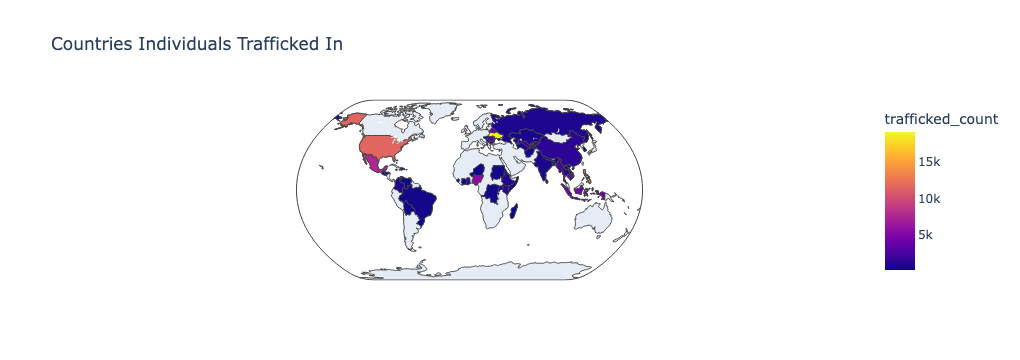

In [77]:
fig = px.choropleth(
    trafficked_counts,
    locations='ISO-alpha3 Code',
    color='trafficked_count',
    projection='natural earth',
    title='Countries Individuals Trafficked In')

fig.show()



I created a choropleth map of the world by first counting up all of the victim's citizenships. Then, I call the columns of the trafficked_counts and the iso-code for the citizenship country in order to plot the coropleth map. On the map, Ukraine, the Phillipines, and the United States are the countries with the most trafficked victims. There are moderate activity of trafficking in the other major countries like China, Russia, Brazil, India, and some countries in Africa. Aside from these countries, the other locations seem to have very low trafficking activities.


In [73]:
exploited_counts = merged_data['CountryOfExploitation'].value_counts().reset_index()
exploited_counts.columns = ['ISO-alpha3 Code','exploited_count']
exploited_counts.head(5)

,ISO-alpha3 Code,exploited_counts
0,USA,109109
1,UKR,11030
2,RUS,8846
3,MDA,6975
4,LBY,2936


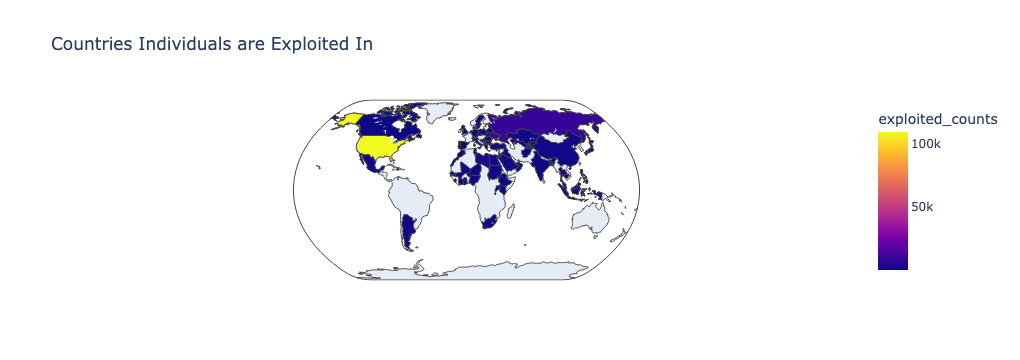

In [78]:
fig = px.choropleth(
    exploited_counts,
    locations='ISO-alpha3 Code',
    color='exploited_counts',
    projection='natural earth',
    title='Countries Individuals are Exploited In')

fig.show()


After creating the first choropleth map, I wanted to create another one depicting to which coutries are the victims displaced to. This graph is a little different from the citizenship map with the United States exceedingly surpassing all the other countries in exploitation. This is a very interesting find, in my opinion.


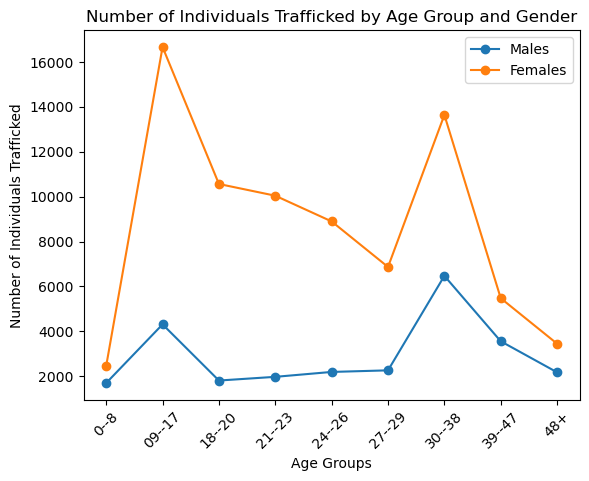

In [38]:
males = traf_df2[traf_df2['gender'] == 'Man']
females = traf_df2[traf_df2['gender'] == 'Woman']

males_counts = males.groupby('ageBroad').size()
females_counts = females.groupby('ageBroad').size()

plt.plot(males_counts.index, males_counts.values, label='Males', marker='o')
plt.plot(females_counts.index, females_counts.values, label='Females', marker='o')

plt.xlabel('Age Groups')
plt.ylabel('Number of Individuals Trafficked')
plt.title('Number of Individuals Trafficked by Age Group and Gender')
plt.xticks(rotation=45)
plt.legend()

First, I created a new dataframes separately for rows with individuals listed as "Man" and rows listed the individual as "Woman". I ,then, count these individuals up by age groups. Next, I created a line plot with the number of individuals trafficked as the function of age groups for both males and females. According to the line plot, female population seems to be the most targeted and in both females and males, the age target groups are 9-17 and 30-38 years old. 

## Analyses: subtitle about the analyses/models you are using 

Include other analyses here, including extracting insights using pandas and also potentially including hypothesis tests and machine learning methods in the final version of your project once we have disucssed these methods in class. 


IntimatePartners 8233
Friends 7094
Family 9901
Others 37637


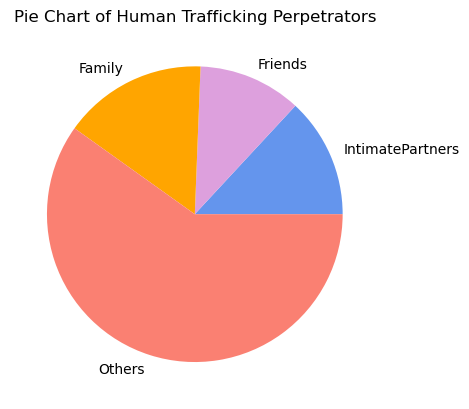

In [51]:
perpetrators = traf_df2[["recruiterRelationIntimatePartner","recruiterRelationFriend","recruiterRelationFamily", "recruiterRelationOther"]]

recruiterRelationIntimatePartner = perpetrators["recruiterRelationIntimatePartner"]
recruiterRelationFriend = perpetrators["recruiterRelationFriend"]
recruiterRelationFamily = perpetrators["recruiterRelationFamily"]
recruiterRelationOther = perpetrators["recruiterRelationOther"]


intimatePartners = (recruiterRelationIntimatePartner == 1.0).sum()
print("IntimatePartners", intimatePartners)

friends = (recruiterRelationFriend == 1.0).sum()
print("Friends", friends)

family = (recruiterRelationFamily == 1.0).sum()
print("Family", family)

others = (recruiterRelationOther == 1.0).sum()
print("Others", others)

total_perpetrators_counts = [intimatePartners, 
                    friends,
                   family,
                   others]
perpetrators_labels = ["IntimatePartners", "Friends", "Family", "Others"]
colors = ["cornflowerblue", "plum", "orange", "salmon"]
                   
plt.pie(total_perpetrators_counts, labels=perpetrators_labels, colors=colors);
plt.title("Pie Chart of Human Trafficking Perpetrators");


I began to create the pie graph by creating different data frames for each columns referring to if the perpetrators as fimly, friends, intimate partners, or others. For each of these data frames, I counted up the total number for each. Then, I was ready to create the pie graph. The pie graph showed perpetrators not family, friends, not intimate partners make up more than half the population of perpetrators even though friends, family, and intimate partners do make up an obscense part of the populations. The population of family as perpetrators is greater than that of friends or Intimate Partners.

## Conclusions

After visualizing the data, I am able to answer my questions. The top five geographical locations where victims of trafficking are of highest is Ukraine, Phillipines, the United States, Modolva, and Mexico. In addition, the top five countries of exploitation were also observed. Knowing this, we can push policimakers to write and enforce stricter laws and precautions in these countries. 

In the perspective of gender and age, females are more vulnerable to trafficking compared to males, and within these sex groups, age groups of 9-17 and 30-38 years old are the more vulnerable targets. Vulnerable targets and their parents or guardians should be more wary and cautious to pay more attention to these groups. 

Further analyses showed more than half of perpetrators are not family, friends, nor intimate partners. This representation goes against many news outlets and newspaper reporting that most perpetrators are family and friends. Yes, we should be wary of all but I believe there's many documentaries on family and friends perpetrators and not others. This could warped the perspectives of the public.



## Reflection

The topic of this analysis is a big intrest of mine because as we can observed, the most vulnerable targets are the youths and I believe an important goal in our world is to protect the children. 

Additional analyses I would like to perform is a correlation test between contries of citizenship and country of exploitations. I would like to see if individuals are trafficked and displace within the same country or another country which could provide much insights on international relations. 

This project was more difficult and require more time than I had anticipated. What went well was the line plot and the pie charts. I spent too much times figuring out the choroppleth maps. Cleaning and wrangling the data was most difficult for me because I was a little confused on the merging, but eventually figured it out. For the table with the top five countries of exploitations and citizenship I wanted to add a column "Country or Area" so the audience knows what the ISO codes mean too. I couldn't figure out how to do yet, so I did not do that yet. 

I spent ~25 hours on this draft but I believe I will need more time polishing up for the final draft. I am definitely unsure of the clear directions I want to take right now and would highly want to edit my draft.

Thing I would like to add on for my final draft:
1. Perform a correlation test between country of citizenship and country of exploitation
2. Add percentage onto the pie graph


## Appendix (optional)

If there is additional code you would like to include (in order to keep your project report 10 pages or less) you can include it here. Additionally, you could create a GitHub page that has all the working code and data for your analyses (this could be beneficial later as well if you want to show this to future employers, etc.).  

